In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Snowflake time of flight

Have you ever watched a snowflake fall and thought, "How long has that snowflake been falling?"

Here, we want to determine the time of flight for a snowflake. We'll start simple and add some complexity to make a more accurate model. 

## Simplest model

The simplest assumption we can make is that the only force acting on the snowflake is gravity. This leads to one differential equation, 

$-mg = m\ddot{y}$

where $m$ is the mass of the snowflake, $g=9.81~\frac{m}{s^2}$, and $\ddot{y}$ is the second derivative with respect to time for the height of the snowflake i.e. its vertical acceleration. 

We integrate this equation twice to create a solution in terms of $y_0$, initial height and $\dot{y}_0$, its initial vertical velocity. 

$\ddot{y} = -g$

$\frac{d\dot{y}}{dt} = -g$

$\dot{y} -\dot{y}_0 = -gt$

$\frac{dy}{dt} = \dot{y}_0 -gt$

$y-y_0 = \dot{y}_0t - \frac{gt^2}{2}$

$y(t) = y_0 +\dot{y}_0t - \frac{gt^2}{2}$

Now, we need the initial height and initial speed of the snowflake. A typical cloud might sit $\approx 1,000~m$ above the ground and let's assume the initial vertical speed is 0 m/s. 

This leaves, $y_0=1000~m~and~\dot{y}_0=0~m/s$

![Cloud heights and precipitation](https://upload.wikimedia.org/wikipedia/commons/5/57/Cloud_types_en.svg)

Text(0, 0.5, 'height (m)')

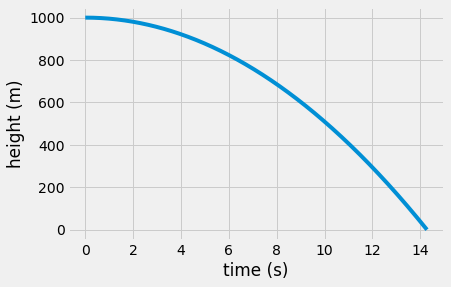

In [30]:
t = np.linspace(0, np.sqrt(1000/9.81*2), 1000)
y = 1000 - 9.81*t**2/2
plt.plot(t,y)
plt.xlabel('time (s)')
plt.ylabel('height (m)')

In [31]:
t[-1]

14.278431229270645

## Our solution - constant acceleration

According to your calculations, the snowflake will start at 1,000-m altitude and reach ground level at almost 14.3 seconds. 

> __Note:__ What's wrong with the height curve here? 

## A little problem - speed of snowflake

The graph of height-vs-time keeps getting steeper. The steeper the graph, the faster the snowflake. How fast is your snowflake traveling when it hits the ground?

Text(0, 0.5, 'vertical speed (m/s)')

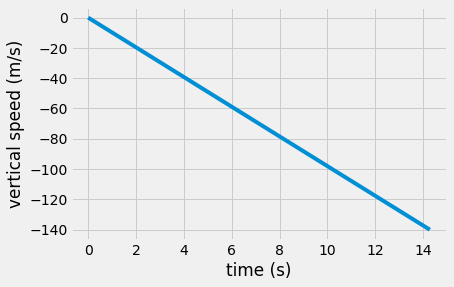

In [33]:
dy = -9.81*t

plt.plot(t, dy)
plt.xlabel('time (s)')
plt.ylabel('vertical speed (m/s)')

According to your calculations, the snowflake is traveling at 140 m/s when it strikes the ground. This is >300 mph (or >500 km/h). Whoah...

If you caught this snowflake on your tongue it would feel like catching an icy [BB gun pellet](https://en.wikipedia.org/wiki/BB_gun#Safety), ouch!

You are missing a key force in the free body diagram that _slows_ down the snowflake, [_air resistance_ or drag](https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/falling.html).

![Air drag free body diagram](https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/Images/falling.gif)

## Improved model with air resistance

Adding drag to the free body diagram, now you have a new model. 

$m\ddot{y} = -mg + C_d \frac{r\dot{y}^2}{2}A$

where $C_d$ is the [unitless drag coefficient](https://en.wikipedia.org/wiki/Drag_coefficient), $r=1.025~kg/m^3$ is the [density of air](https://www.macinstruments.com/blog/what-is-the-density-of-air-at-stp/),  $m=3~mg$ is the [mass of a snowflake](https://hypertextbook.com/facts/2001/JudyMoy.shtml), and $A=\pi D^2/4$ is the area of the snowflake of [diameter](https://gpm.nasa.gov/sites/default/files/document_files/parsivel_Tokay_c3vp_agu.pdf) $D=6~mm$. 

> __Note:__ The force of drag always opposes the velocity of the snowflake. Keep in mind if the snowflake moves upward, the force reverses direction. 

Now, integrating  the equation can be a bit involved, but using v(t=0)=0, there results

$\frac{dv}{dt} = -g +\frac{C_d rA}{2}v^2$

$v(t) = -\sqrt{\frac{mg}{C_d rA}}\tanh\frac{g C_d rA}{m}t$


Text(0, 0.5, 'vertical speed (m/s)')

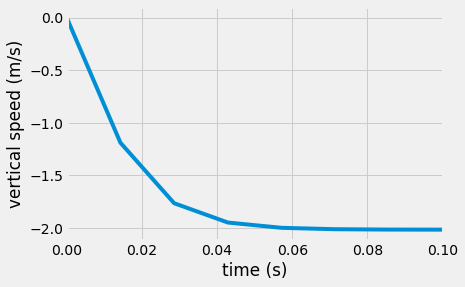

In [35]:
m = 3e-6 # mg
Cd = 0.5 # no units
r = 1.025 # kg/m/m/m
g = 9.81 #m/s/s
D = 6e-3 # mm - mm
A = np.pi*D**2/4
v = -np.sqrt(2*m*g/Cd/r/A)*np.tanh(g*Cd*r*A/m*t)
plt.plot(t, v)
plt.xlim(0,0.1)
plt.xlabel('time (s)')
plt.ylabel('vertical speed (m/s)')

### Make a comparison to previous model

In the constant acceleration model, the snowflake reached the ground in 14 seconds. In the improved air resistance model, you find that the snowflake only accelerates for 0.5 seconds. After that, it floats at a constant velocity until impact. This means, you can approximate that the snowflake travels at a constant velocity equal to its terminal velocity, $v_{term}$, as such

$\frac{dv}{dt} = 0 = -g +\frac{C_d rA}{2m}v_{term}^2$

$v_{term} = -\sqrt{\frac{2mg}{C_d rA}}$

total flight time is 496.1728506287249


Text(0, 0.5, 'height (m)')

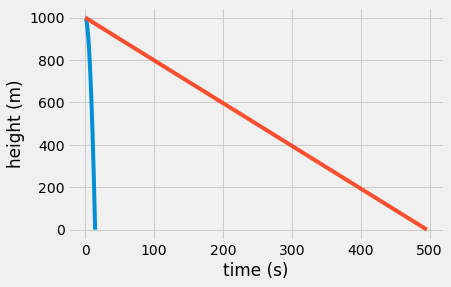

In [38]:
vterm = np.sqrt(2*m*g/Cd/r/A)
t_improved = np.linspace(0,1000/vterm) 
y_improved = 1000 - vterm*t_improved
plt.plot(t,y, label = 'constant acceleration')
plt.plot(t_improved,y_improved, label='constant velocity')
print('total flight time is {}'.format(t_improved[-1]))
plt.xlabel('time (s)')
plt.ylabel('height (m)')


## Wrapping up

The first model you created assumed constant acceleration, but after accounting for drag you found out that a snowflake reaches a terminal velocity in less than 0.5 seconds. The more accurate model to calculate time of flight was actually a constant velocity model. 

You found that the snowflake drifts slowly to the surface over the course of 496 seconds (or 8 minutes). Gently landing at 2 m/s. 